Start with Shrinkage models:

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.decomposition import PCA, SparsePCA, FastICA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, SVC
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [98]:
data = pd.read_csv('data/price_data_filtered.csv', index_col=0, parse_dates=True)
data.tail()

,STOXX EUROPE 600 \nE - PRICE INDEX,STOXX EUROPE 600 \nBANKS E - PRICE INDEX,STOXX EUROPE 600 \nFINANCIALS E - PRICE INDEX,STOXX EUROPE 600 \nAUTO & PARTS E - PRICE INDEX,STOXX EUROPE 600 \nINSURANCE E - PRICE INDEX,STOXX EUROPE 600 \nTECHNOLOGY E - PRICE INDEX,STOXX EUROPE 600 \nUTILITIES E - PRICE INDEX,STOXX EUROPE 600 \nCHEMICALS E - PRICE INDEX,STOXX EUROPE 600 \nBASIC RESOURCE E - PRICE INDEX,STOXX EUROPE 600 \nCON & MAT E - PRICE INDEX,STOXX EUROPE 600 \nHEALTH CARE E - PRICE INDEX,STOXX EUROPE 600 \nINDS GDS & SVS E - PRICE INDEX,STOXX EUROPE 600 \nMEDIA E - PRICE INDEX,STOXX EUROPE 600 \nTELECOM E - PRICE INDEX
2021-09-01,473.123,137.105,218.459,625.259,309.675,816.033,396.884,1312.686,593.656,631.365,1040.949,779.914,360.955,240.289
2021-10-01,452.897,139.835,215.834,630.213,303.691,741.713,363.426,1248.539,540.547,581.521,986.327,737.698,351.207,228.949
2021-11-01,478.865,150.619,231.872,678.609,320.779,807.080,392.884,1316.179,564.657,617.930,1056.962,762.544,356.543,223.070
2021-12-01,470.862,139.734,220.570,656.661,310.670,812.144,389.468,1306.550,570.064,611.488,1030.112,760.739,359.789,225.157
2022-01-01,489.988,146.388,229.872,675.257,325.112,806.015,407.840,1368.250,601.215,647.029,1076.658,802.949,372.238,231.135


In [99]:
# plot the data
#fig, ax = plt.subplots(figsize=(10,10), dpi=200)
#ax.plot(data.index, data, label='Price Index');

In [100]:
# define the input and output variables and write a loop such that we can use the benchmark as target and the other variables as input
X_all = data.iloc[:, 1:]
y_all = data.iloc[:, 0].to_frame()

for x in range(0,13):
    x_name = X_all.columns[x]
    X = X_all.iloc[:, x].values.reshape(-1, 1)

    # Print column name
    print(f'Using column "{x_name}" as input variable')

    for col in range(1):
        col_name = y_all.columns[col]
        y = y_all.values

        # Print column name
        print(f'Using column "{col_name}" as target variable')

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using column "STOXX EUROPE 600 
BANKS E - PRICE INDEX" as input variable
Using column "STOXX EUROPE 600 
E - PRICE INDEX" as target variable
Using column "STOXX EUROPE 600 
FINANCIALS E - PRICE INDEX" as input variable
Using column "STOXX EUROPE 600 
E - PRICE INDEX" as target variable
Using column "STOXX EUROPE 600 
AUTO & PARTS E - PRICE INDEX" as input variable
Using column "STOXX EUROPE 600 
E - PRICE INDEX" as target variable
Using column "STOXX EUROPE 600 
INSURANCE E - PRICE INDEX" as input variable
Using column "STOXX EUROPE 600 
E - PRICE INDEX" as target variable
Using column "STOXX EUROPE 600 
TECHNOLOGY E - PRICE INDEX" as input variable
Using column "STOXX EUROPE 600 
E - PRICE INDEX" as target variable
Using column "STOXX EUROPE 600 
UTILITIES E - PRICE INDEX" as input variable
Using column "STOXX EUROPE 600 
E - PRICE INDEX" as target variable
Using column "STOXX EUROPE 600 
CHEMICALS E - PRICE INDEX" as input variable
Using column "STOXX EUROPE 600 
E - PRICE INDEX" as 

Linear Regression: Last actual value = [102.75], Last predicted value = [172.63687122]
Ridge: Last actual value = [102.75], Last predicted value = [172.63688465]
Lasso: Last actual value = [102.75], Last predicted value = 172.64539717126894
Elastic Net: Last actual value = [102.75], Last predicted value = 172.64339048263923
Lasso Lars CV: Last actual value = [102.75], Last predicted value = 172.63687121615922


/Users/antonkruse/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


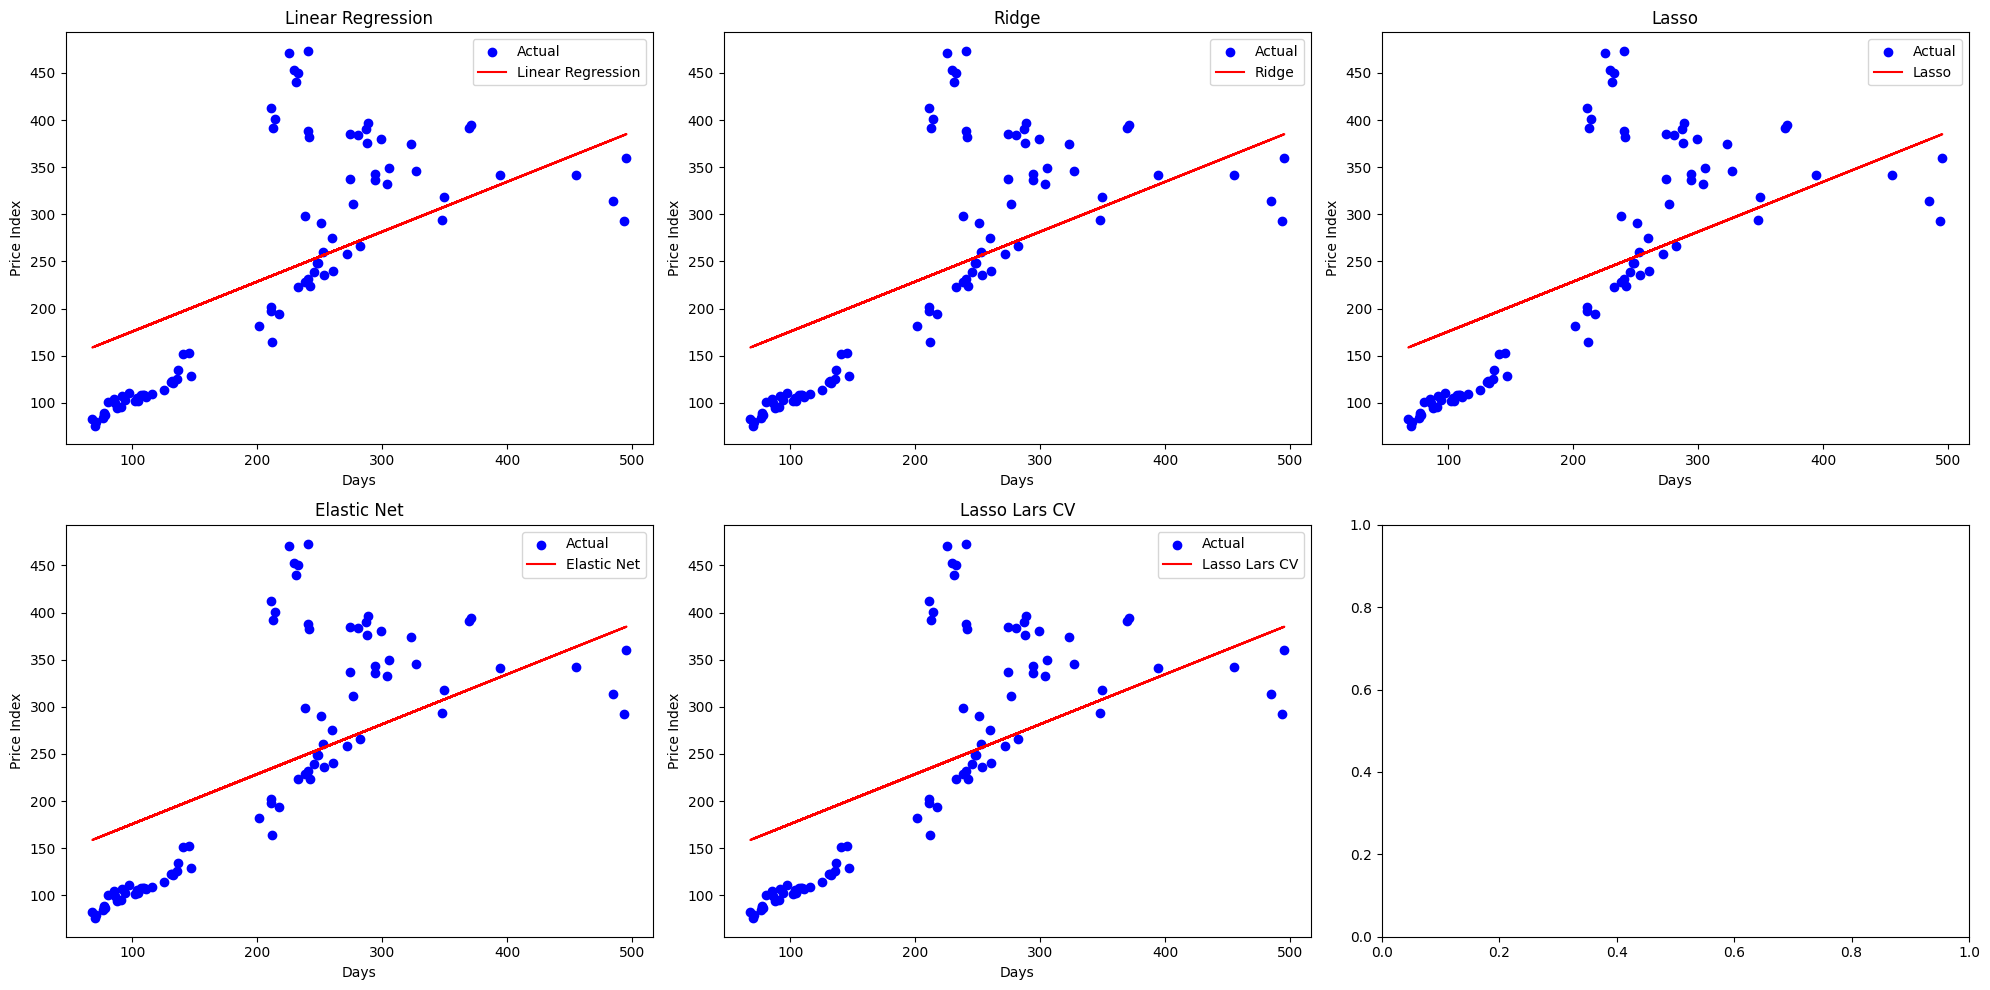

In [101]:
shrinkage_models = {'Linear Regression': LinearRegression(),
          'Ridge': Ridge(alpha=1),
          'Lasso': Lasso(alpha=1),
          'Elastic Net': ElasticNet(alpha=1, l1_ratio=0.5),
          'Lasso Lars CV': LassoLarsCV(cv=3)}

# Set up the figure and subplot axes
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(shrinkage_models.items()):
    # Fit the model
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {y_pred[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].plot(X_test, y_pred, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()

PLS Regression: Last actual value = [102.75], Last predicted value = [172.63687122]


AttributeError: 'PLSSVD' object has no attribute 'predict'

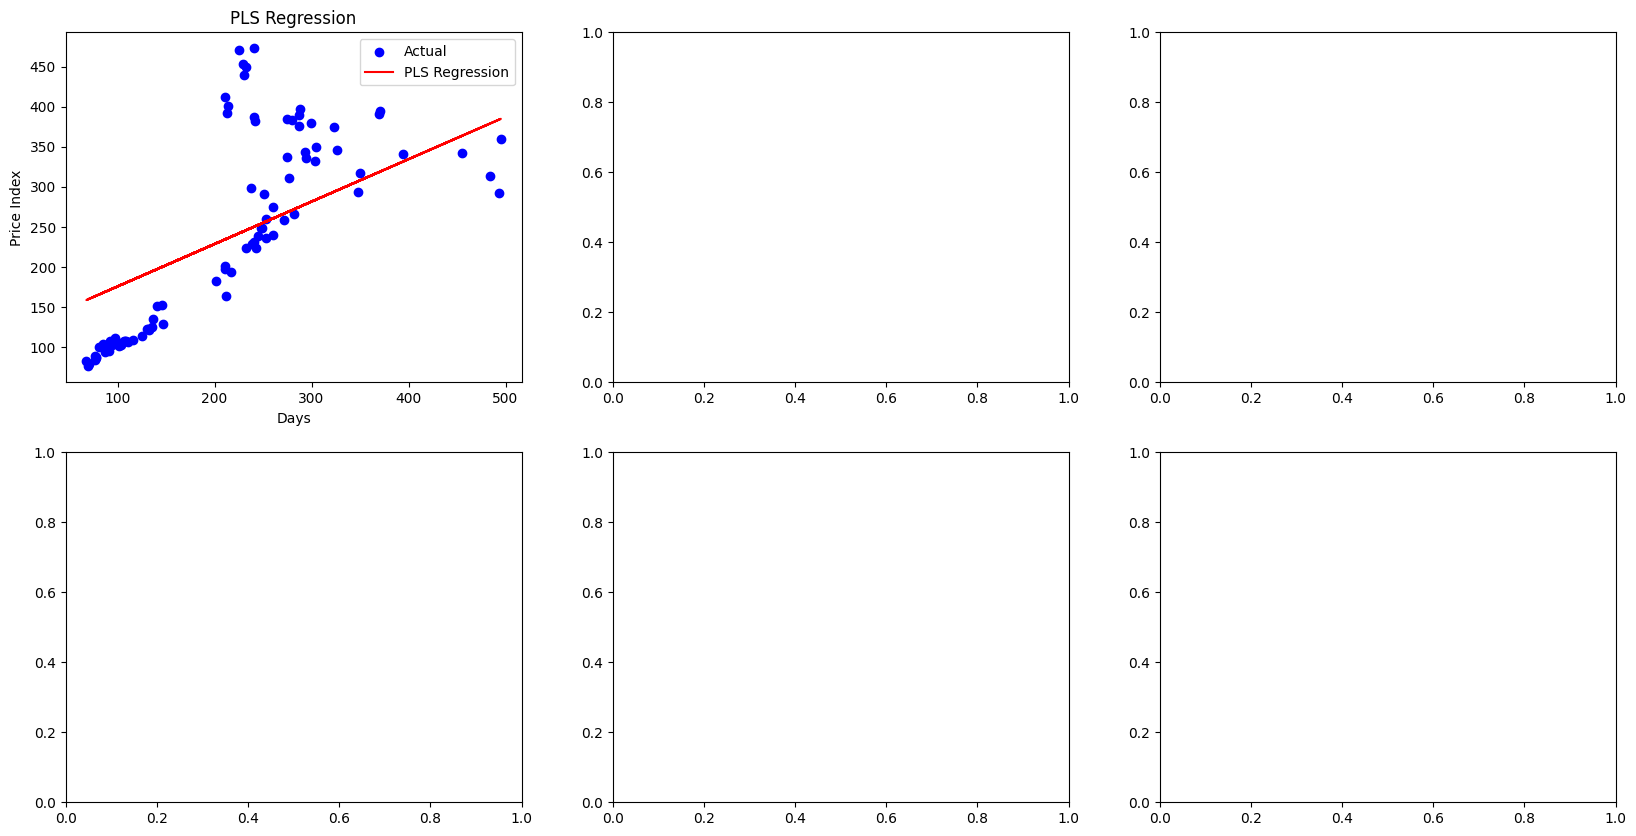

In [102]:
dimentionality_reduction_models = {'PLS Regression': PLSRegression(n_components=1),
                                    'PLS SVD': PLSSVD(n_components=1),
                                    'PCA': PCA(n_components=1),
                                    'Sparse PCA': SparsePCA(n_components=1),
                                    'Fast ICA': FastICA(n_components=1)}

# Set up the figure and subplot axes
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(dimentionality_reduction_models.items()):
    # Fit the model
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {y_pred[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].plot(X_test, y_pred, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()

/var/folders/jr/jvqd5mmj25sg1lj_gtw12nm00000gn/T/ipykernel_4871/2333622250.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = model.fit(X_train, y_train).predict(X_test)
/Users/antonkruse/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/antonkruse/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/jr/jvqd5mmj25sg1lj_gtw12nm00000gn/T/ipykernel_4871/2333622250.py:16: DataConversionWarning: A column-vector y was pa

Random Forest: Last actual value = [102.75], Last predicted value = 95.79905864577506
Gradient Boosting Regressor: Last actual value = [102.75], Last predicted value = 106.25084382003416
Ada Boost: Last actual value = [102.75], Last predicted value = 100.02810810810811
Extra Trees: Last actual value = [102.75], Last predicted value = 108.01539999999999
Support Vector Machine Regressor: Last actual value = [102.75], Last predicted value = 104.58733525953596


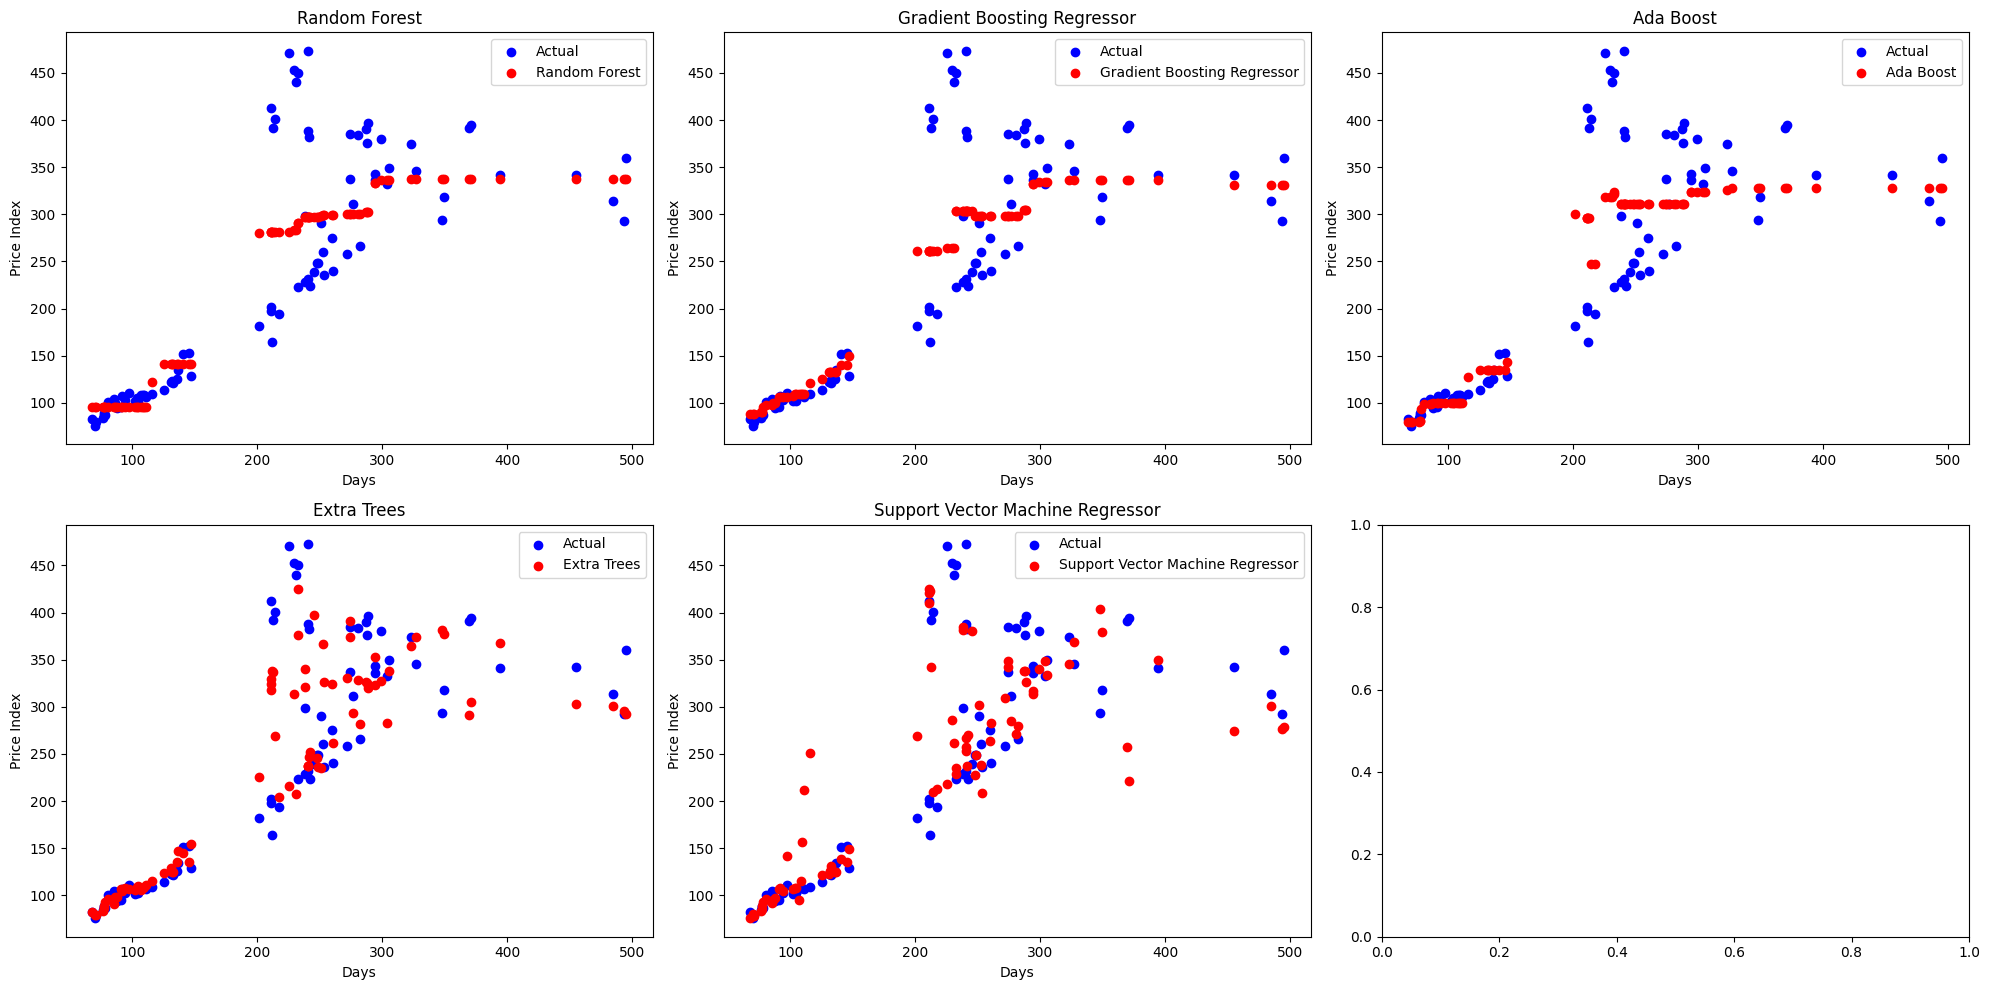

In [ ]:
nonlinear_ML_models = {'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0),
                        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
                        #'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0), 
                        'Ada Boost': AdaBoostRegressor(n_estimators=100, random_state=0),
                        'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0),
                        'Support Vector Machine Regressor': SVR(kernel='rbf', C=1e3, gamma=0.1)}
                       # ,'Support Vector Machine Classifier': SVC(kernel='rbf', C=1e3, gamma=0.1)

# Set up the figure and subplot axes
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(nonlinear_ML_models.items()):
    # Fit the model
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {y_pred[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].scatter(X_test, y_pred, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
# combination_ML_models
"""
equally-weighted average of ML forecasts, also known as mean combination, is a simple ensemble method that combines the predictions of 
multiple machine learning models by taking the average of their individual predictions
"""
# create list of models
y_pred_linear = LinearRegression().fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_ridge = Ridge(alpha=1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_lasso = Lasso(alpha=1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_lasso_lars_cv = LassoLarsCV(cv=3).fit(X_train, y_train).predict(X_test).reshape(-1, 1)

y_pred_random_forest = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_ada_boost = AdaBoostRegressor(n_estimators=100, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_extra_trees = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_support_vector_machine_regressor = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)

mean_prediction_shrinkage = np.mean([y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_elastic_net, y_pred_lasso_lars_cv], axis=0)
mean_prediction_nonlinear = np.mean([y_pred_random_forest, y_pred_gradient_boosting_regressor, y_pred_ada_boost, y_pred_extra_trees, y_pred_support_vector_machine_regressor], axis=0)

/Users/antonkruse/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/jr/jvqd5mmj25sg1lj_gtw12nm00000gn/T/ipykernel_4871/3975088245.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred_random_forest = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
/Users/antonkruse/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/antonkruse/.pyenv/versions/3.9

Mean Combination Shrinkage: Last actual value = [102.75], Last predicted value = [172.63988295]
Mean Combination Nonlinear: Last actual value = [102.75], Last predicted value = [102.93614917]


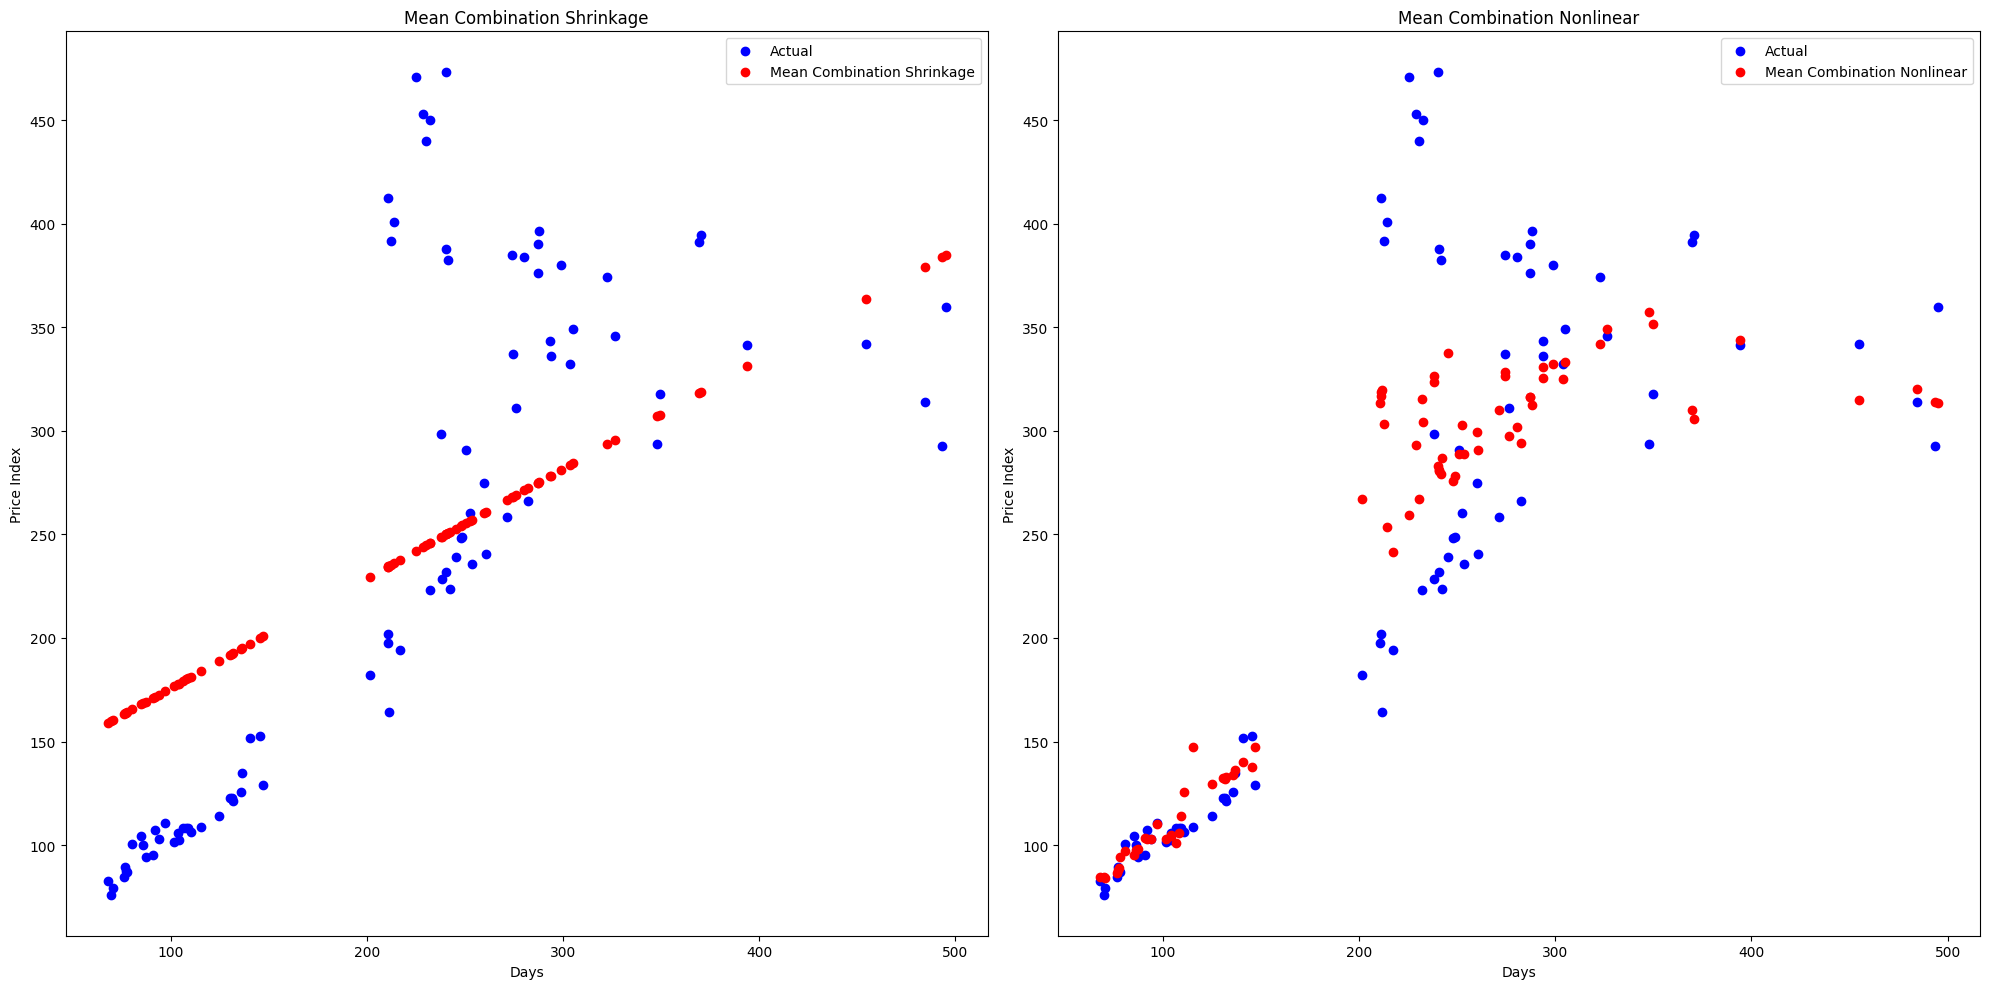

In [ ]:
combination_models = {'Mean Combination Shrinkage': mean_prediction_shrinkage, 
                      'Mean Combination Nonlinear': mean_prediction_nonlinear}

# Set up the figure and subplot axes
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(combination_models.items()):
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {model[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].scatter(X_test, model, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()